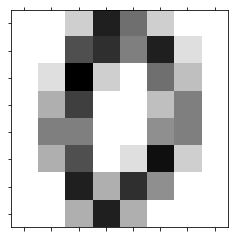

In [39]:
from sklearn import datasets
from sklearn.metrics.pairwise import cosine_similarity # 余弦相似度
from sklearn.metrics.pairwise import chi2_kernel # 卡方核
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 将MNIST数据库加载到sklearn
digits = datasets.load_digits()
def display_img(img_no):
    fig, ax = plt.subplots()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.matshow(digits.images[img_no], cmap = plt.cm.binary)

display_img(1167)

In [15]:
# 查看图片的实际矩阵
digits.images[1]

array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
       [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
       [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

In [20]:
digits.data[0].shape

(64,)

In [18]:
digits.target[0]

0

In [29]:
# 计算第一个图像（索引号为0）和所有图像之间的相似度
x = digits.data
co_sim = cosine_similarity(x[0].reshape(1,-1), x)
co_sim

array([[ 1.        ,  0.51910234,  0.61684198, ...,  0.71121668,
         0.82580797,  0.74430965]])

In [30]:
# 余弦相似度
cosf = pd.DataFrame(co_sim).T
cosf.columns = ['similarity']
cosf.sort_values('similarity', ascending = False)

,similarity
0,1.000000
877,0.980739
464,0.974474
1365,0.974188
1541,0.971831
1167,0.971130
1029,0.970858
396,0.968793
1697,0.966019
646,0.965490


In [37]:
# 卡方核相似度
k_sim = chi2_kernel(x[0].reshape(1,-1), x)
kf = pd.DataFrame(k_sim).T
kf.columns = ['similarity']
kf.sort_values('similarity', ascending = False)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

,similarity
0,1.000000e+00
1167,1.644255e-07
877,1.040593e-07
464,1.232666e-08
1541,8.598399e-09
1365,8.274881e-09
1029,1.907361e-09
855,1.487874e-10
1697,1.191874e-10
957,1.870301e-11


In [6]:
import cPickle
def load_CIFAR_Labels(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict
imgs = load_CIFAR_Labels(r'E:\cifar-10-python\cifar-10-batches-py\batches.meta')
imgs

{'batch_label': 'training batch 1 of 5',
 'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 'filenames': ['leptodactylus_pentadactylus_s_000004.png',
  'camion_s_000148.png',
  'tipper_truck_s_001250.png',
  'american_elk_s_001521.png',
  'station_wagon_s_000293.png',
  'coupe_s_001735.png',
  'cassowary_s_001300.png',
  'cow_pony_s_001168.png',
  'sea_boat_s_001584.png',
  'tabby_s_001355.png',
  'muntjac_s_001000.png',
  'arabian_s_001354.png',
  'quarter_horse_s_000672.png',
  'passerine_s_000343.png',
  'camion_s_001895.png',
  'trailer_truck_s_000335.png',
  'dumper_s_000821.png',
  'alley_cat_s_000200.png',
  'accentor_s_000677.png',
  'frog_s_001671.png',
  'capreolus_capreolus_s_000051.png',
  'tomcat_s_000772.png',
  'picker

In [8]:
import graphlab
# graphlab.get_dependencies()
graphlab.canvas.set_target('ipynb')
gl_img = graphlab.SFrame(imgs)
gl_img

RuntimeError: All column should be of the same length

In [4]:
# import pickle as p
# import cPickle as p
# import numpy as np

# def load_CIFAR_batch(filename):
#     """ load single batch of cifar """
#     with open(filename, 'rb')as f:
#         datadict = p.load(f)
#         X = datadict['data']
#         Y = datadict['labels']
#         X = X.reshape(10000, 3, 32, 32)
#         Y = np.array(Y)
#         return X, Y
    
# def load_CIFAR_Labels(file):
#     with open(file, 'rb') as fo:
#         dict = cPickle.load(fo)
#     return dict
   
# # def load_CIFAR_Labels(filename):
# #     with open(filename, 'rb') as f:
# #         lines = [x for x in f.readlines()]
# #         print lines
        
# lables = load_CIFAR_Labels(r'E:\cifar-10-python\cifar-10-batches-py\batches.meta')
# imgX, imgY = load_CIFAR_batch(r"E:\cifar-10-python\cifar-10-batches-py\data_batch_1")
# print imgX.shape

(10000L, 3L, 32L, 32L)
